# Finding Similar Items: Textually Similar Documents
### Authors: Eva Engel, Tori Leatherman -------------------- November 14, 2022
 How to run the code: 
 1. 'pip install -r /path/to/requirements.txt'
 1. Download https://webz.io/free-datasets/technology-news-articles/ and save it as 'data/tech_articles.zip'
 1. Run all the cells.



### Import libraries and class functions

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time

import sys
sys.path.insert(0,"..")
from classes import Shingling, Compare_sets, Min_hashing, Compare_signatures, Lsh
from preprocessor import Preprocessor
from dataset_reader import read_dataset

### Initialize parameters and functions

In [2]:
k_shingles = 10
n_signature = 500
n_documents = 100
sim_threshold = 0.8
n_bands = 100

# Classes 

1. Preprocessor():

In order to better compare documents, we normalise the strings. Among other preprocessing step, we set the strings to lowercase, remove punctuation and numbers, and normalize whitespace.

2. Shingling():

For a document, we compute by default shingles of size 10 and find all unique ones. In order to create a characteristic matric that includes the set of all documents we want to map the unique set of shingles to an id. Therefore, we use the method "create_char_matrix(self, doc_list)".

3. Compare_sets():

The method jaccard_similarity takes two collections of shingles in order to compute the jaccard similarity by taking the intersection and dividing it by the union of the collections.

4. Min_Hashing():

This class contains a method to compute the signatures given a characteristic matrix. We therefore use permutation. We permute the rows of the characteristic matrix and define the minhash function for this permutation. In this case, we set h(C) as the number of the first (in the permuted order) row in which column C has 1. 

5. Compare_signatures():

Its underlying method computes the signature similarity of two documents by comparing how many out of all signatures are identical.

6. Bonus: Lsh():

The method find_candidates computes the candidate pairs using the LSH technique. More specifically: we first divide the signature matrix into b bands. After hashing each band for each document, we find potential candidates (i.e. documents which are quite likely to be similiar) in order to use the method find_similar that sets documents to be equal if their signature similarity is above a defined threshold.

In [3]:
preprocessor = Preprocessor()
shingling = Shingling(k_shingles)
min_hashing = Min_hashing(n_signature)
lsh = Lsh(n_bands, sim_threshold)

## Data Set: Explore Technology news articles
https://webz.io/free-datasets/technology-news-articles/

The zipped data set consists of 22,292 articles about technology news articles, crawled from Sep - Oct, 2015. 

In [16]:
# Read and preprocess data using the preprocessor class

docs = read_dataset('tech_articles.zip', n_documents)
preprocessed_docs = preprocessor.preprocess_documents(docs)

22292
Data set tech_articles.zip is processed. 100 documents are saved.


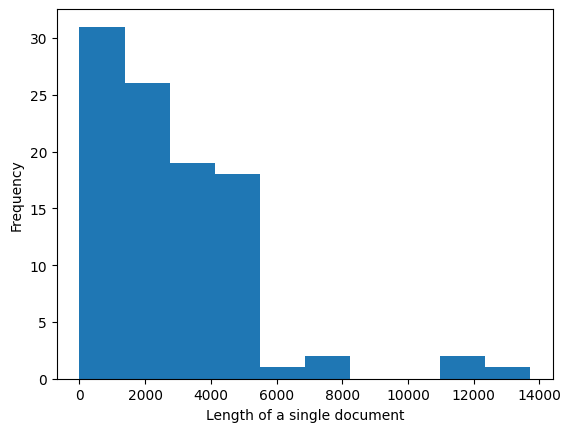

In [15]:
length_docs = [len(doc) for doc in docs]
plt.hist(length_docs)
plt.xlabel('Length of a single document')
plt.ylabel('Frequency')
plt.show()

### Use shingling, min hashing, and LSH to find similar documents

In [20]:
character_matrix = shingling.create_char_matrix(preprocessed_docs)
signature = min_hashing.compute_signature_perm(character_matrix)
similar_documents = lsh.find_similar(signature)
print(similar_documents)

[(46, 75), (46, 78), (75, 78), (92, 94)]


### Evaluate scalability based  on duration time and size of dataset

In [6]:
n_documents = [10, 100, 250, 500, 750, 1000]
durations = []

for n in n_documents:
    t = time.time()
    docs = read_dataset('tech_articles.zip', n)
    preprocessed_docs = preprocessor.preprocess_documents(docs)

    character_matrix = shingling.create_char_matrix(preprocessed_docs)
    signature = min_hashing.compute_signature_hash(character_matrix)
    similar_documents = lsh.find_similar(signature)
    elapsed = time.time() - t
    durations.append(elapsed)
    
print(durations)

Data set tech_articles.zip is processed. 10 documents are saved.
Data set tech_articles.zip is processed. 100 documents are saved.
Data set tech_articles.zip is processed. 250 documents are saved.
Data set tech_articles.zip is processed. 500 documents are saved.
Data set tech_articles.zip is processed. 750 documents are saved.
Data set tech_articles.zip is processed. 1000 documents are saved.
[2.131704092025757, 9.800106048583984, 23.138997077941895, 43.12470078468323, 85.3265290260315, 108.53764200210571]


### Plot of the Number of Documents vs the Execution Time

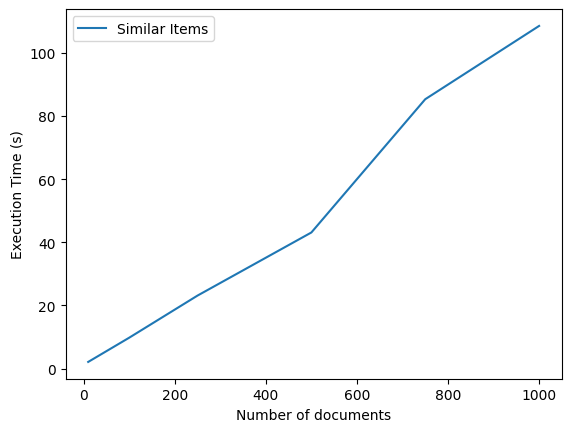

In [7]:
plt.plot(n_documents, durations, label='Similar Items')
plt.xlabel('Number of documents')
plt.ylabel('Execution Time (s)')
plt.legend()
plt.show()

As can be seen in the graph of number of documents versus the execution time, the execution time increases as the number of documents input increases. This is to be expected, as there are more possible combinations of pairs that would result in candidate pairs through LSH.

### Evaluate the number of similar items found, and the execution time based on band size

In [12]:
n_bands = [10, 25, 50, 75, 100]
sim_threshold = 0.8
n_documents = 500
n_similar_docs = []
durations = []

for n in n_bands:
    lsh = Lsh(n, sim_threshold)
    t = time.time()
    docs = read_dataset('tech_articles.zip', n_documents)
    preprocessed_docs = preprocessor.preprocess_documents(docs)

    character_matrix = shingling.create_char_matrix(preprocessed_docs)
    signature = min_hashing.compute_signature_hash(character_matrix)
    similar_documents = lsh.find_similar(signature)
    n_similar_docs.append(len(similar_documents))

    elapsed = time.time() - t
    durations.append(elapsed)

Data set tech_articles.zip is processed. 500 documents are saved.
Data set tech_articles.zip is processed. 500 documents are saved.
Data set tech_articles.zip is processed. 500 documents are saved.
Data set tech_articles.zip is processed. 500 documents are saved.
Data set tech_articles.zip is processed. 500 documents are saved.


### Plot of the Number of Similar Pairs vs the Band size

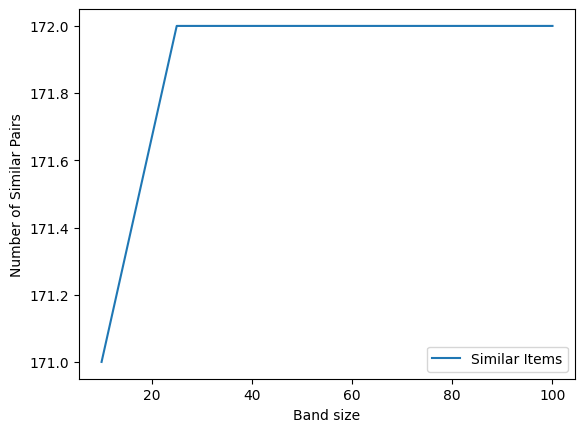

In [13]:
plt.plot(n_bands, n_similar_docs, label ='Similar Items')
plt.ylabel('Number of Similar Pairs')
plt.xlabel('Band size')
plt.legend()
plt.show()

### Plot of the Execution Time vs the Band Size

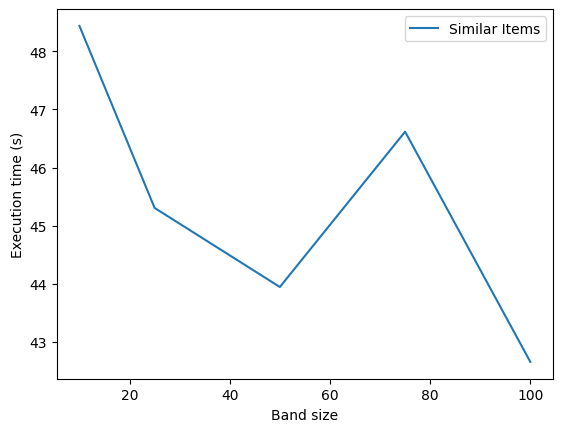

In [14]:
plt.plot(n_bands, durations, label ='Similar Items')
plt.ylabel('Execution time (s)')
plt.xlabel('Band size')
plt.legend()
plt.show()